In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline

In [2]:
data = scipy.io.loadmat('data/ex8_movies.mat')

In [3]:
R = data['R']
Y = data['Y']
print R[:5]
print Y[:5]
print Y.shape

[[1 1 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 1]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[5 4 0 ..., 5 0 0]
 [3 0 0 ..., 0 0 5]
 [4 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]]
(1682, 943)


In [4]:
'Average rating for movie 1 (Toy Story): %f / 5' % np.mean(Y[0, R[0, :]])

'Average rating for movie 1 (Toy Story): 4.520679 / 5'

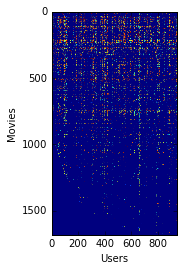

In [5]:
plt.figure()
plt.imshow(Y, aspect='equal', origin='upper')
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show()

In [6]:
data = scipy.io.loadmat('data/ex8_movieParams.mat')
X = data['X']
Theta = data['Theta']
num_users = data['num_users']
num_movies = data['num_movies']
num_features = data['num_features']

#  Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

In [7]:
print X[:5]
print Theta[:5]
print Y[:5]
print R[:5]

[[ 1.0486855  -0.40023196  1.19411945]
 [ 0.78085123 -0.38562591  0.52119779]
 [ 0.64150886 -0.54785385 -0.08379638]
 [ 0.45361782 -0.80021844  0.68048129]
 [ 0.93753789  0.1060899   0.36195295]]
[[ 0.28544362 -1.68426509  0.26293877]
 [ 0.50501321 -0.45464846  0.31746244]
 [-0.43191656 -0.47880449  0.84671111]
 [ 0.72859839 -0.27189391  0.3268436 ]]
[[5 4 0 0]
 [3 0 0 0]
 [4 0 0 0]
 [3 0 0 0]
 [3 0 0 0]]
[[1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [8]:
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    X = np.array(params[:num_movies*num_features]).reshape(num_features, num_movies).T.copy()
    Theta = np.array(params[num_movies*num_features:]).reshape(num_features, num_users).T.copy()
    # You need to return the following values correctly
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    J = 1. / 2 * np.sum(np.sum(np.multiply(R, (X.dot(Theta.T) - Y) ** 2 ))) + Lambda / 2 * ( np.sum(np.sum(X ** 2)) + np.sum(np.sum(Theta ** 2)))
    return J
    
J = cofiCostFunc(np.hstack((X.T.flatten(), Theta.T.flatten())), Y, R, num_users, num_movies,
               num_features, 0)
J

22.224603725685675

In [9]:
from computeNumericalGradient import computeNumericalGradient
def checkCostFunction(Lambda=0):
    """Creates a collaborative filering problem
    to check your cost function and gradients, it will output the
    analytical gradients produced by your code and the numerical gradients
    (computed using computeNumericalGradient). These two gradient
    computations should result in very similar values.
    """

    ## Create small problem
    X_t = np.random.rand(4, 3)
    Theta_t = np.random.rand(5, 3)

    # Zap out most entries
    Y = X_t.dot(Theta_t.T)
    Y[np.where(np.random.random_sample(Y.shape) > 0.5, True, False)] = 0
    R = np.zeros(Y.shape)
    R[np.where(Y != 0, True, False)] = 1

    ## Run Gradient Checking
    X = np.random.random_sample(X_t.shape)
    Theta = np.random.random_sample(Theta_t.shape)
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = Theta_t.shape[1]

   # Unroll parameters
    params = np.hstack((X.T.flatten(), Theta.T.flatten()))

    costFunc = lambda t: cofiCostFunc(t, Y, R, num_users, num_movies, num_features, Lambda)

    def costFunc_w(t):
        Jgrad = costFunc(t)
        return Jgrad

    numgrad = computeNumericalGradient(costFunc_w, params)

    cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)


    print np.column_stack((numgrad, grad))

    print 'The above two columns you get should be very similar.\n' \
             '(Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n'

    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)

    print 'If your backpropagation implementation is correct, then\n ' \
          'the relative difference will be small (less than 1e-9). \n' \
          '\nRelative Difference: %g\n' % diff
# checkCostFunction()

In [10]:
J = cofiCostFunc(np.hstack((X.T.flatten(), Theta.T.flatten())), Y, R, num_users, num_movies,
               num_features, 1.5)
J

31.344056244274221

In [11]:
# checkCostFunction(1.5)

In [12]:
import io
def loadMovieList():
    """
    reads the fixed movie list in movie.txt
    and returns a cell array of the words in movieList.
    """

    ## Read the fixed movieulary list
    with io.open('data/movie_ids.txt', encoding='ISO-8859-1') as f:

        # Store all movies in cell array movie{}
        n = 1682  # Total number of movies 

        movieList = []
        for i in range(n):
            # Read line
            line = f.readline()
            # Word Index (can ignore since it will be = i)
            str = line.split()
            # Actual Word
            movieList.append(' '.join(str[1:]).strip())
        return movieList
movieList = loadMovieList()

In [13]:
print movieList[:5]
print len(movieList)

[u'Toy Story (1995)', u'GoldenEye (1995)', u'Four Rooms (1995)', u'Get Shorty (1995)', u'Copycat (1995)']
1682


In [14]:
my_ratings = np.zeros(len(movieList))

In [15]:
# Check the file movie_idx.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings[0] = 4

# Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

In [16]:
print 'New user ratings:'
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print 'Rated %d for %s\n' % (my_ratings[i], movieList[i])

New user ratings:
Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for Die Hard 2 (1990)

Rated 5 for Sphere (1998)



In [17]:
data = scipy.io.loadmat('data/ex8_movies.mat')
Y = data['Y']
R = data['R'].astype(bool)

In [18]:
Y = np.column_stack((my_ratings, Y))
R = np.column_stack((my_ratings, R)).astype(bool)

In [19]:
def normalizeRatings(Y, R):
    m,n = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)
    for i in range(m):
        idx = np.where(R[i,:] == 1)
        Ymean[i] = np.mean(Y[i,idx])
        Ynorm[i,idx] = Y[i,idx] - Ymean[i]
    return Ynorm, Ymean
Ynorm, Ymean = normalizeRatings(Y, R)

In [20]:
print Ynorm[:5], Ymean[:5]
print Ynorm.shape, Ymean.shape

[[ 0.1214128   1.1214128   0.1214128  ...,  1.1214128   0.          0.        ]
 [ 0.         -0.20610687  0.         ...,  0.          0.          1.79389313]
 [ 0.          0.96666667  0.         ...,  0.          0.          0.        ]
 [ 0.         -0.55023923  0.         ...,  0.          0.          0.        ]
 [ 0.         -0.30232558  0.         ...,  0.          0.          0.        ]] [ 3.8785872   3.20610687  3.03333333  3.55023923  3.30232558]
(1682, 944) (1682,)


In [21]:
#  Useful Values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

In [22]:
# Set Initial Parameters (Theta, X)
X = np.random.rand(num_movies, num_features)
Theta = np.random.rand(num_users, num_features)

initial_parameters = np.hstack((X.T.flatten(), Theta.T.flatten()))
# Set Regularization
Lambda = 10

In [23]:
costFunc = lambda p: cofiCostFunc(p, Ynorm, R, num_users, num_movies, num_features, Lambda)
gradFunc = lambda p: cofiCostFunc(p, Ynorm, R, num_users, num_movies, num_features, Lambda)

In [24]:
from scipy.optimize import minimize
result = minimize(costFunc, initial_parameters, method='CG', jac=gradFunc, options={'disp': True, 'maxiter': 1000.0})
theta = result.x
cost = result.fun

         Current function value: 425543.499162
         Iterations: 0
         Function evaluations: 18
         Gradient evaluations: 6


In [25]:
print theta
print cost

[ 0.07040477  0.2957594   0.31988153 ...,  0.15991585  0.28281638
  0.96042188]
425543.499162


In [26]:
X = theta[:num_movies*num_features].reshape(num_movies, num_features)
Theta = theta[num_movies*num_features:].reshape(num_users, num_features)

print 'Recommender system learning completed.'

Recommender system learning completed.


In [27]:
p = X.dot(Theta.T)
my_predictions = p[:, 0] + Ymean

movieList = loadMovieList()

# sort predictions descending
pre=np.array([[idx, p] for idx, p in enumerate(my_predictions)])
post = pre[pre[:,1].argsort()[::-1]]
r = post[:,1]
ix = post[:,0]

print '\nTop recommendations for you:'
for i in range(10):
    j = int(ix[i])
    print 'Predicting rating %.1f for movie %s\n' % (my_predictions[j], movieList[j])

print '\nOriginal ratings provided:'
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print 'Rated %d for %s\n' % (my_ratings[i], movieList[i])


Top recommendations for you:
Predicting rating 8.1 for movie They Made Me a Criminal (1939)

Predicting rating 7.8 for movie Taxi Driver (1976)

Predicting rating 7.6 for movie Silence of the Lambs, The (1991)

Predicting rating 7.5 for movie Everest (1998)

Predicting rating 7.5 for movie Schindler's List (1993)

Predicting rating 7.4 for movie It's a Wonderful Life (1946)

Predicting rating 7.4 for movie Wings of Desire (1987)

Predicting rating 7.4 for movie Star Kid (1997)

Predicting rating 7.3 for movie Maya Lin: A Strong Clear Vision (1994)

Predicting rating 7.3 for movie Marlene Dietrich: Shadow and Light (1996)


Original ratings provided:
Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for 